In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
data = pd.read_csv("handtalk.csv")

In [106]:
print(data.columns)

Index(['Flex-Right-1    ', 'Flex-Right-2    ', 'Flex-Right-3    ',
       'Flex-Right-4    ', 'Flex-Right-5    ', 'Output'],
      dtype='object')


In [107]:
X = data.drop("Output", axis=1)  # Features
y = data["Output"]  # Target variable

In [108]:
# Check for null values in the output column
null_columns = data.columns[data.isnull().any()]
if "Output" in null_columns:
    print("Output column contains null values. Removing rows with null values...")
    data.dropna(subset=["Output"], inplace=True)

# Separate features (X) and target variable (y) after removing null values
X = data.drop(columns=["Output"])
y = data["Output"]

Output column contains null values. Removing rows with null values...


In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [110]:
knn = KNeighborsClassifier(
    n_neighbors=1
)  # You can adjust the number of neighbors as needed

In [111]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

In [112]:
# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

c:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [113]:
# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

c:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [114]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [115]:
# Initialize the K-Nearest Neighbors classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

In [116]:
# Perform cross-validation
cv_scores = cross_val_score(best_knn, X, y, cv=5)  # 5-fold cross-validation

c:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [117]:
# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.93333333 1.         0.93333333 0.8        0.66666667]
Mean CV accuracy: 0.8666666666666668


In [118]:
# Train the classifier with the best hyperparameters on the entire training set
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [119]:
# Make predictions on the testing set
y_pred = best_knn.predict(X_test)

In [120]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8695652173913043


In [121]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                             precision    recall  f1-score   support

            Gaurav Sir Best       1.00      1.00      1.00         1
               Good Evening       1.00      1.00      1.00         2
               Good Morning       1.00      1.00      1.00         2
                    Hari OM       1.00      1.00      1.00         1
Hi Guys! I am Venus Dharmik       1.00      1.00      1.00         1
               How are you?       1.00      1.00      1.00         1
                  I am okay       1.00      1.00      1.00         1
                I need Food       0.00      0.00      0.00         0
                I need Help       0.00      0.00      0.00         3
   I need to go to washroom       1.00      1.00      1.00         1
            I want my stick       1.00      1.00      1.00         1
          I want some sleep       1.00      1.00      1.00         1
              Not Available       1.00      1.00      1.00         3
          

c:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

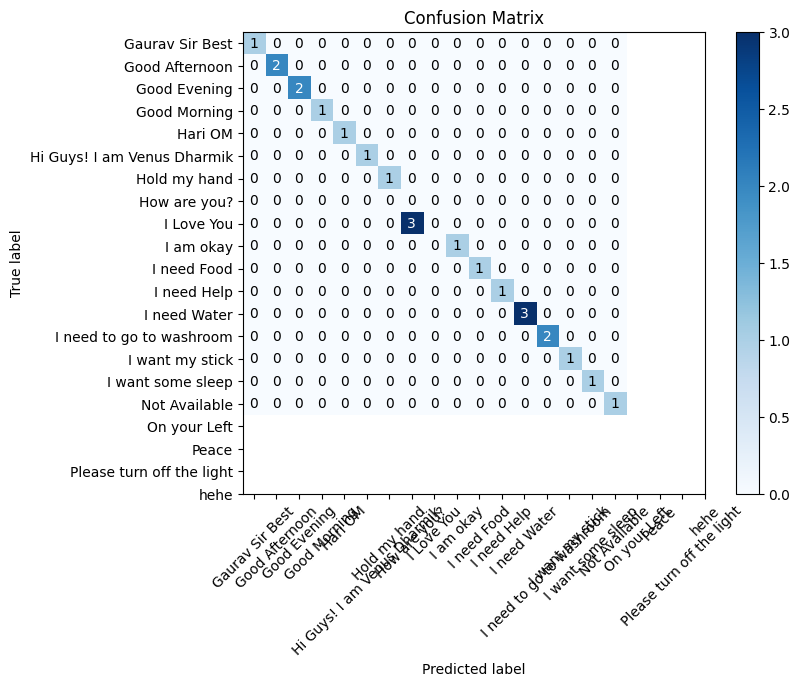

In [122]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(np.arange(len(np.unique(y))), np.unique(y), rotation=45)
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            format(cm[i, j], "d"),
            ha="center",
            va="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black",
        )
plt.show()